In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/myothida/SML_Teaching/main/data/Suicide_Ideation_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1785 non-null   object
 1   Suicide  1787 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


In [ ]:
df.info

<bound method DataFrame.info of                                                   Tweet  \
0                                     making some lunch   
1                           @Alexia You want his money.   
2     @dizzyhrvy that crap took me forever to put to...   
3     @jnaylor #kiwitweets Hey Jer! Since when did y...   
4     Trying out &quot;Delicious Library 2&quot; wit...   
...                                                 ...   
1782    i have forgotten how much i love my Nokia N95-1   
1783  Starting my day out with a positive attitude! ...   
1784  @belledame222 Hey, it's 5 am...give a girl som...   
1785  2 drunken besties stumble into my room and we ...   
1786  @dancingbonita &quot;I friggin love you!!!&quo...   

                      Suicide  
0            Not Suicide post  
1            Not Suicide post  
2     Potential Suicide post   
3            Not Suicide post  
4            Not Suicide post  
...                       ...  
1782         Not Suicide post  
1783         Not Suicide post  
1784         Not Suicide post  
1785         Not Suicide post  
1786         Not Suicide post  

[1787 rows x 2 columns]>

In [ ]:
df.describe()

,Tweet,Suicide
count,1785,1787
unique,1777,2
top,Became as hot as the persistent days resting h...,Not Suicide post
freq,2,1127


In [ ]:
df.corr

<bound method DataFrame.corr of                                                   Tweet  \
0                                     making some lunch   
1                           @Alexia You want his money.   
2     @dizzyhrvy that crap took me forever to put to...   
3     @jnaylor #kiwitweets Hey Jer! Since when did y...   
4     Trying out &quot;Delicious Library 2&quot; wit...   
...                                                 ...   
1782    i have forgotten how much i love my Nokia N95-1   
1783  Starting my day out with a positive attitude! ...   
1784  @belledame222 Hey, it's 5 am...give a girl som...   
1785  2 drunken besties stumble into my room and we ...   
1786  @dancingbonita &quot;I friggin love you!!!&quo...   

                      Suicide  
0            Not Suicide post  
1            Not Suicide post  
2     Potential Suicide post   
3            Not Suicide post  
4            Not Suicide post  
...                       ...  
1782         Not Suicide post  
1783         Not Suicide post  
1784         Not Suicide post  
1785         Not Suicide post  
1786         Not Suicide post  

[1787 rows x 2 columns]>

In [ ]:
df.head(5)

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post


In [ ]:
df["Suicide"].value_counts()

Suicide
Not Suicide post           1127
Potential Suicide post      660
Name: count, dtype: int64

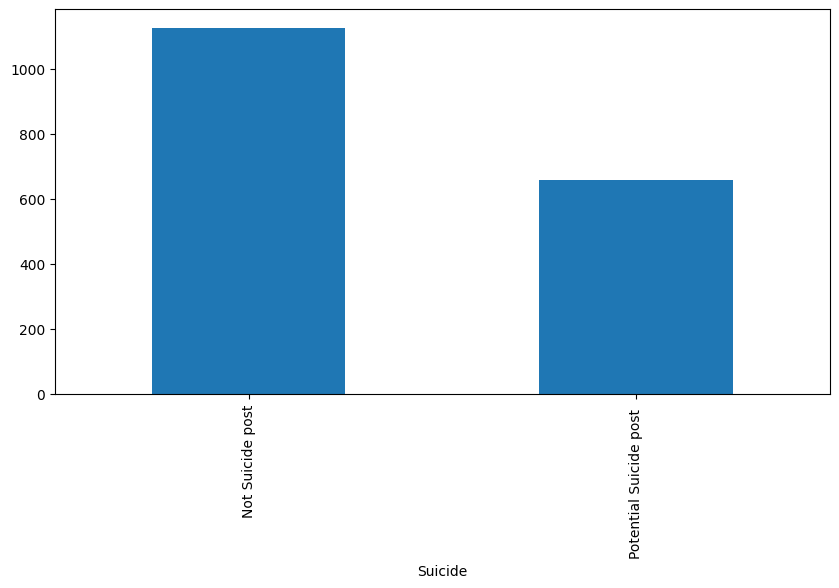

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
df['Suicide'].value_counts().plot(kind='bar',x='text',y='label')
plt.show()

# **Train Test Split & Toknizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import scipy.sparse as sp
import numpy as np

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1785 non-null   object
 1   Suicide  1787 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


In [ ]:
df.dropna(subset=['Suicide'], inplace=True)

In [ ]:
df.rename(columns={'Tweet': 'text', 'Suicide': 'class'}, inplace=True)

In [ ]:
df.head()

,text,class
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1785 non-null   object
 1   class   1787 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Handle missing values (remove rows with NaN in 'Tweet' column)
df.dropna(subset=['text'], inplace=True)

# Split the data into features (X) and the target variable (y)
#X = df['text']  # Assuming 'Tweet' is the column containing text data
#y = df['class']  # Assuming 'Suicide' is the target variable

vectorizer = CountVectorizer()
X = vectorize.fit_transform(df['
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


SyntaxError: unterminated string literal (detected at line 15) (<ipython-input-14-7cc828428550>, line 15)

# **KNN**

In [ ]:
# Create a pipeline with Count Vectorization, KNN classifier, and StandardScaler
steps = [#('count_vectorizer', CountVectorizer()),  # Convert text data to word counts
         ('scaler', StandardScaler(with_mean=False)),  # Standardize features without mean centering
         ('knn', KNeighborsClassifier(n_neighbors=3))]

knn_pipeline = Pipeline(steps)

knn_pipeline.fit(X_train, y_train)

y_pred = knn_pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

ypred_train = knn_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = knn_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

In [ ]:
ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)

## **Gaussian NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
#--------------------------------------------------
## ------------ NB Classifier ------------------##
#--------------------------------------------------

gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)

ypred_train = gnb.predict(X_train.toarray())
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

In [ ]:

gnb = GaussianNB()
gnb.fit(X_test.toarray(), y_test)

ypred_test = gnb.predict(X_test.toarray())
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

# **MultinomialNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#--------------------------------------------------
## ------------ Mulinomial NB Classifier ------------------##
#--------------------------------------------------

mnb = MultinomialNB()
mnb.fit(X_train.toarray(), y_train)

ypred_train = mnb.predict(X_train.toarray())
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

In [ ]:
mnb.fit(X_test.toarray(), y_test)

ypred_test = mnb.predict(X_test.toarray())
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

# **BernoulliNB**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
#--------------------------------------------------
## ------------ Bernoulli NB Classifier ------------------##
#--------------------------------------------------

bnb = MultinomialNB()
bnb.fit(X_train.toarray(), y_train)

ypred_train = bnb.predict(X_train.toarray())
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)
print(mat_clf)
print(report_clf)

In [ ]:
bnb.fit(X_test.toarray(), y_test)

ypred_test = bnb.predict(X_test.toarray())
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)